In [60]:
# Imports libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sb
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from sklearn import linear_model

In [61]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!jupyter serverextension enable voila --sys-prefix

In [62]:
# Imports data
data=pd.read_csv('./data.csv')

In [63]:
table_text = widgets.HTML(value="<p>Here is an example of the raw data that is used.</p>")
purpose_text = widgets.HTML(value="<p>The purpose of this tool is to use timestamp and temperature variables to perform multi-linear regression and estimate the amount of people we are likely to find in the gym.</p>")
bar_text = widgets.HTML(value="<h4>Total count of individuals through the year at each hour of the day</h4><p>People are more likely to visit the gym later in the day.</p>")
scatter_text = widgets.HTML(value="<h4>Number of people in the gym at ranging temperatures</h4><p>There is a slight preference for warmer weather.</p>")
prediction_text = widgets.HTML(value="<h4>Crowdedness Predictor</h4><p>Select a temperature and time and we will predict how many people will be in the gym.</p>")

In [64]:
line_0 = widgets.HTML(value="<h1>Gym Crowd Prediction</h1><h4>by Jon Rhoads</h4>")
line_1 = widgets.VBox([table_text, purpose_text])
line_2 = widgets.HBox([bar_text])
line_3 = widgets.VBox([scatter_text])
line_4 = widgets.VBox([prediction_text])

In [65]:
display(line_0)

HTML(value='<h1>Gym Crowd Prediction</h1><h4>by Jon Rhoads</h4>')

In [66]:
display(line_1)

In [67]:
# Displays raw data
data.head(10)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
5,46,2015-08-14 18:00:18-07:00,64818,4,0,0,72.15,0,0,8,18
6,43,2015-08-14 18:20:08-07:00,66008,4,0,0,72.15,0,0,8,18
7,53,2015-08-14 18:30:09-07:00,66609,4,0,0,72.15,0,0,8,18
8,54,2015-08-14 18:40:14-07:00,67214,4,0,0,72.15,0,0,8,18
9,43,2015-08-14 18:50:15-07:00,67815,4,0,0,72.15,0,0,8,18


In [68]:
display(line_2)

<AxesSubplot:>

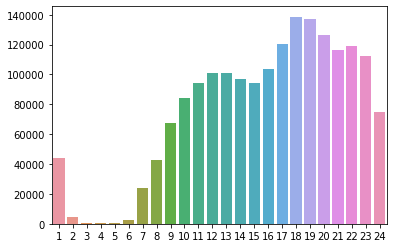

In [69]:
peopleByHour = []
for i in range(1,25):
    totalPeoplePerHour = 0
    for index, row in data.iterrows():
        if(row['timestamp']/3600 > i - 1 and row['timestamp']/3600 < i):
            totalPeoplePerHour += row['number_people']
    peopleByHour.append(totalPeoplePerHour)

sb.barplot(x=list(range(1,25)), y=peopleByHour)


In [70]:
display(widgets.HTML(value="<h4>Gym attendees on the weekends</h4><p>In the violin chart we can see that on the weekends there is consistently a lower amount of visitors.</p>"))

HTML(value='<h4>Gym attendees on the weekends</h4><p>In the violin chart we can see that on the weekends there…

<AxesSubplot:xlabel='is_weekend', ylabel='number_people'>

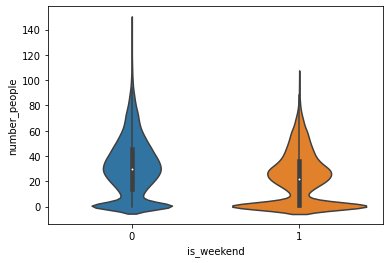

In [71]:
sb.violinplot(y = data['number_people'], x = data['is_weekend'])

In [72]:
display(line_3)

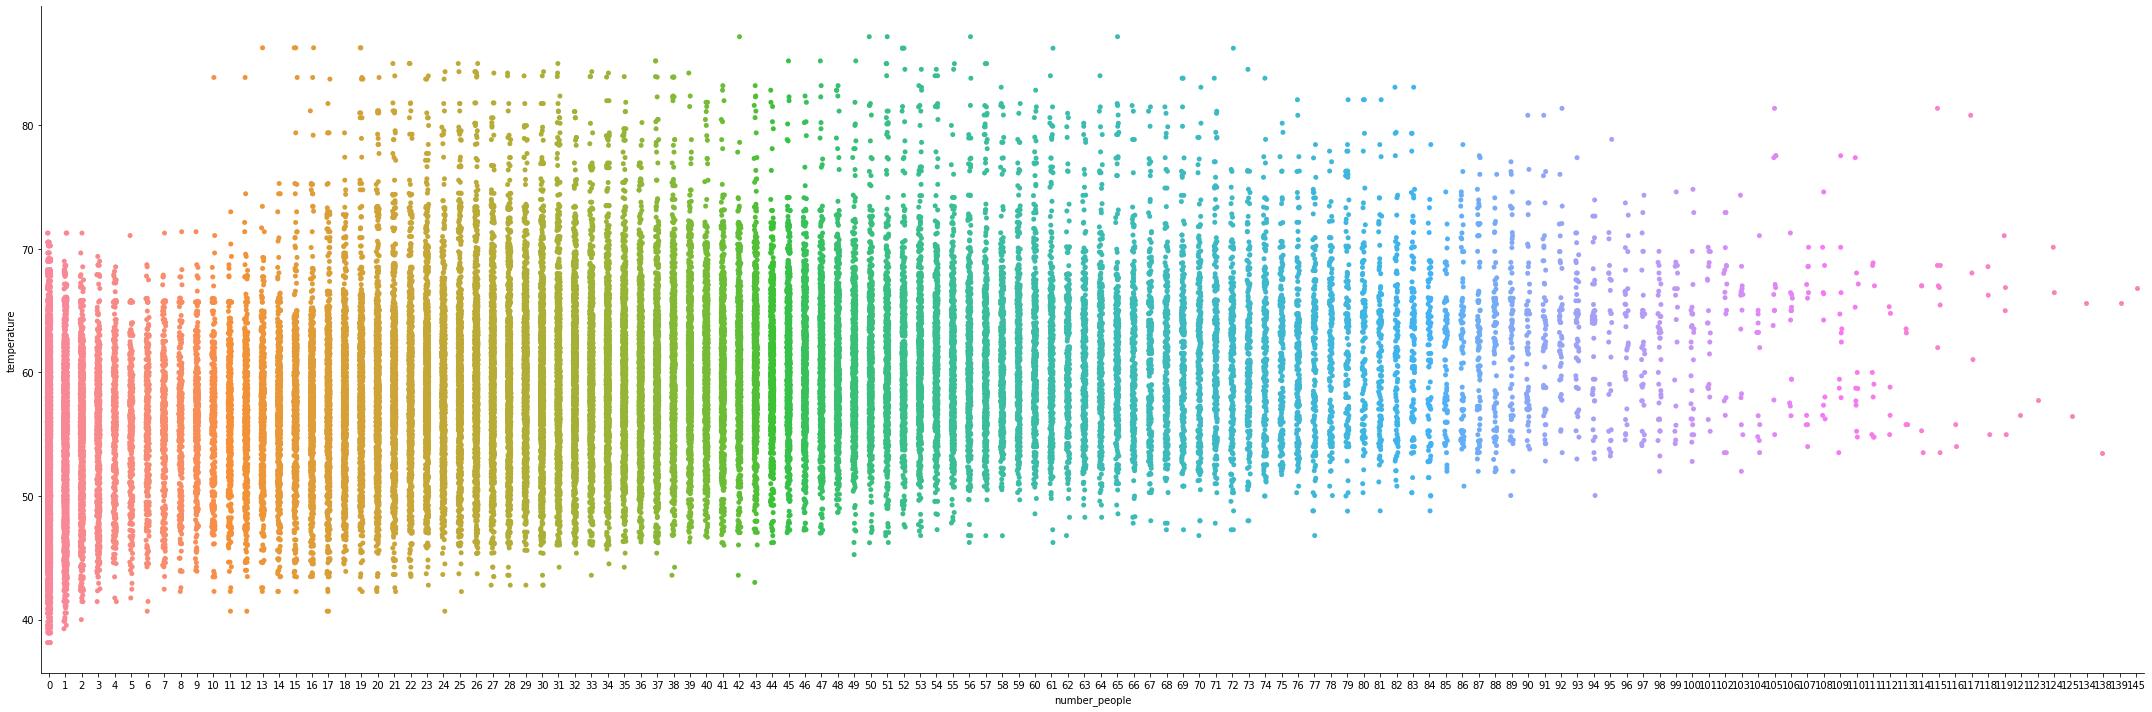

In [73]:
sb.catplot(x='number_people', y='temperature', data=data, height=10, aspect=30/10)


In [74]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(data[['timestamp','temperature']],data.number_people)

LinearRegression()

In [75]:
#lin_reg.coef_

In [76]:
#lin_reg.intercept_

In [77]:
display(line_4)

In [78]:
hours = widgets.Dropdown(
    options=list(range(0,24)),
    continuous_update=True,
    description='Hours:',
)

In [79]:
minutes = widgets.Dropdown(
    options=list(range(0,61)),
    continuous_update=True,
    description='Minutes:',
)

In [80]:
temp = widgets.IntSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    description='Temp:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
)

In [81]:
def show_predictions(hour, minute, temp):
    time = (60 * int(minute)) + (3600 * int(hour))
    result = lin_reg.predict([[time, temp]])
    prediction = result[0]
    if prediction < 0:
        prediction = 0
    print("Based on the inputs, you are likely to see {:.0f} people at the gym".format(prediction))
    
interact(show_predictions, hour = hours, minute = minutes, temp = temp)

interactive(children=(Dropdown(description='Hours:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

<function __main__.show_predictions(hour, minute, temp)>

In [82]:
!pip list --format=freeze > requirements.txt